# Predict the Fare Amount of Future Rides using Regression Analysis  
## Data Preprocessing & Exploratory Data Analysis (EDA)

In this notebook, I will:
- Load and explore the historical Uber ride data  
- Handle missing and invalid values  
- Perform basic exploratory data analysis (EDA)  
- Create new features (feature engineering)  
- Split the dataset into training and testing sets  
- Apply scaling/normalization on numerical features  
- Perform correlation analysis to understand important features  

The processed data from this notebook will be used in the next notebook for building regression models.


### Step 1: Import Required Libraries

Here I import all the Python libraries needed for:
- Data manipulation and analysis  
- Visualization  
- Preprocessing and scaling  
- Splitting the data into train and test sets  


In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# General display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


### Step 2: Load and Explore the Dataset

In this step:
- I load the CSV file that contains the Uber ride data.  
- I look at the first few rows.  
- I try to understand the structure and basic information of the dataset.  


In [2]:
# Load the dataset
df = pd.read_csv("uber_dataset.csv")

In [3]:
# View the first few rows to understand how the data looks
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Step 3: Check the Structure and Basic Info of the Dataset

Now I will:
- Check the shape (rows, columns)  
- See all the column names  
- Check data types and non-null counts using `.info()`  

In [4]:
# Shape of the dataset
print("Dataset shape (rows, columns):", df.shape)

Dataset shape (rows, columns): (200000, 9)


In [5]:
# Column names
print("\nColumns in the dataset:")
print(df.columns.tolist())



Columns in the dataset:
['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [6]:
# Detailed information about each column: datatype and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


### Step 4: Drop Unnecessary Columns

The column `Unnamed: 0` looks like an index column and does not have predictive value.  
I will drop it to keep only useful features.


In [7]:
# Drop the index-like column if it exists
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [8]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Step 5: Descriptive Statistics and Target Variable

- The target variable we want to predict is `fare_amount`.  
- I will use `.describe()` to get summary statistics of numerical columns.  
- Later, I will also visualize the distribution of `fare_amount` to check for skewness and outliers.  


In [9]:
# Summary statistics of numerical columns
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


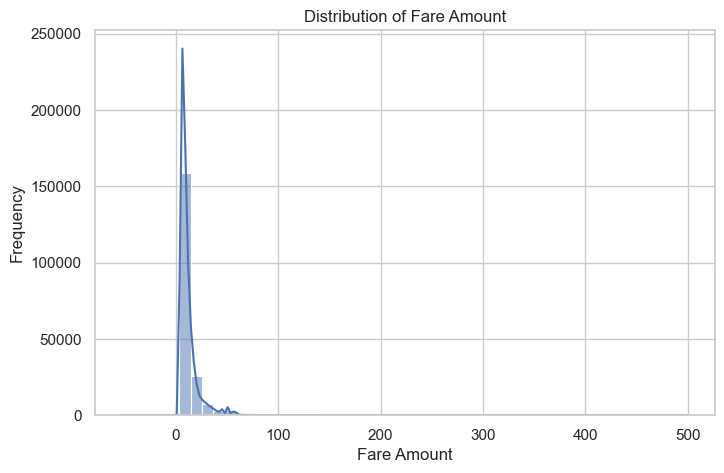

In [10]:
# Plot the distribution of the target variable (fare_amount)
plt.figure(figsize=(8, 5))
sns.histplot(df["fare_amount"], bins=50, kde=True)
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

### Step 6: Identify Missing Data

Missing values can affect model performance.  
In this step, I will:
- Check how many missing values are present in each column.  
- Decide how to handle them (drop or fill) based on importance.  


In [11]:
# Checking missing values in each column
missing_values = df.isna().sum()
print("Missing values in each column:\n")
print(missing_values)

Missing values in each column:

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


### Strategy for Handling Missing Data

Important columns for this project are:
- `fare_amount` (target)
- `pickup_datetime`
- `pickup_longitude`, `pickup_latitude`
- `dropoff_longitude`, `dropoff_latitude`
- `passenger_count`

For these important columns:
- If any of them are missing, I will **drop those rows**, because they are critical for model training.

Other columns like `key` are not used directly as features, so we can ignore missing values there or drop if needed.


In [12]:
# Important columns where values must not be null
important_cols = [
    "fare_amount",
    "pickup_datetime",
    "pickup_longitude",
    "pickup_latitude",
    "dropoff_longitude",
    "dropoff_latitude",
    "passenger_count"
]

In [13]:
# Drop rows where any of the important columns have missing values
df = df.dropna(subset=important_cols)

In [14]:
# Re-check missing values
df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Step 7: Remove Invalid or Unrealistic Values

Some values in the dataset can be logically incorrect, such as:
- Negative or zero `fare_amount`  
- Passenger counts less than 1 or very high (e.g., > 6)  

These values do not make sense for real rides, so I will remove them.


In [15]:
# Remove rows with non-positive (zero or negative) fare
df = df[df["fare_amount"] > 0]

# Keep only realistic passenger counts (1 to 6)
df = df[(df["passenger_count"] >= 1) & (df["passenger_count"] <= 6)]

print("Shape after cleaning invalid values:", df.shape)


Shape after cleaning invalid values: (199268, 8)


### Step 8: Feature Engineering – Time-based Features

The column `pickup_datetime` contains the date and time of the trip.

I will:
- Convert `pickup_datetime` to proper datetime format  
- Extract new features from it:  
  - `pickup_hour` (0–23)  
  - `pickup_dayofweek` (0 = Monday, 6 = Sunday)  
  - `time_of_day` category: Morning / Afternoon / Evening / Night  

These can help the model learn patterns based on time (like peak hours).


In [16]:
# Convert pickup_datetime to datetime format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors="coerce")

In [17]:
# Drop rows where datetime conversion failed
df = df.dropna(subset=["pickup_datetime"])

In [18]:
# Extract hour of the day
df["pickup_hour"] = df["pickup_datetime"].dt.hour

In [19]:
# Extract day of the week (0=Monday, 6=Sunday)
df["pickup_dayofweek"] = df["pickup_datetime"].dt.dayofweek

In [20]:
# Define a function to map hour to time-of-day categories
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

In [21]:
# Create time_of_day feature
df["time_of_day"] = df["pickup_hour"].apply(get_time_of_day)

In [22]:
df[["pickup_datetime", "pickup_hour", "pickup_dayofweek", "time_of_day"]].head()

,pickup_datetime,pickup_hour,pickup_dayofweek,time_of_day
0,2015-05-07 19:52:06+00:00,19,3,Evening
1,2009-07-17 20:04:56+00:00,20,4,Evening
2,2009-08-24 21:45:00+00:00,21,0,Night
3,2009-06-26 08:22:21+00:00,8,4,Morning
4,2014-08-28 17:47:00+00:00,17,3,Evening


### Step 9: Feature Engineering – Distance Between Pickup and Drop-off

We have:
- `pickup_latitude`, `pickup_longitude`  
- `dropoff_latitude`, `dropoff_longitude`  

Using these, I will:
- Calculate the trip distance using the **Haversine formula**  
- Create a new numerical feature `distance_km` (distance in kilometers)  


In [23]:
# Haversine formula to calculate distance in km between two points on Earth
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c


In [24]:
# Create a new column for distance between pickup and dropoff points
df["distance_km"] = haversine_distance(
    df["pickup_latitude"],
    df["pickup_longitude"],
    df["dropoff_latitude"],
    df["dropoff_longitude"]
)

In [25]:
# Remove rows with zero or extremely tiny distance
df = df[df["distance_km"] > 0]

In [26]:
df[["fare_amount", "distance_km"]].head()

,fare_amount,distance_km
0,7.5,1.683323
1,7.7,2.457590
2,12.9,5.036377
3,5.3,1.661683
4,16.0,4.475450


### Step 10: Distance Categories (Short, Medium, Long)

Based on the `distance_km` feature, I will create a categorical feature:
- **Short** → 0–2 km  
- **Medium** → 2–10 km  
- **Long** → > 10 km  

This matches the idea from the problem statement (distance categories).


In [27]:
# Define bins and corresponding labels
bins = [0, 2, 10, np.inf]
labels = ["Short", "Medium", "Long"]

In [28]:
# Create the distance_category column
df["distance_category"] = pd.cut(df["distance_km"], bins=bins, labels=labels)

In [29]:
df[["distance_km", "distance_category"]].head()

,distance_km,distance_category
0,1.683323,Short
1,2.457590,Medium
2,5.036377,Medium
3,1.661683,Short
4,4.475450,Medium


### Step 11: EDA – Relationship between Distance and Fare

Now I will visualize how `fare_amount` changes with `distance_km`.  
We expect that generally, longer distance → higher fare.


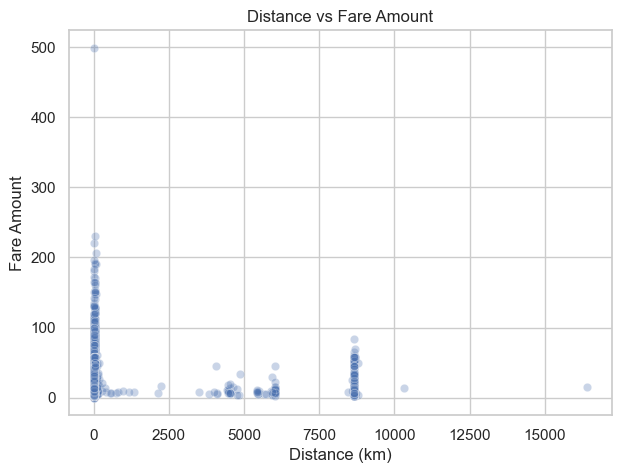

In [30]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="distance_km", y="fare_amount", data=df, alpha=0.3)
plt.title("Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.show()

### Step 12: Correlation Analysis

To find which numerical features are most related to `fare_amount`, I will:
- Select important numerical features  
- Compute the correlation matrix  
- Plot a heatmap  

This will help identify influential features for the regression model.


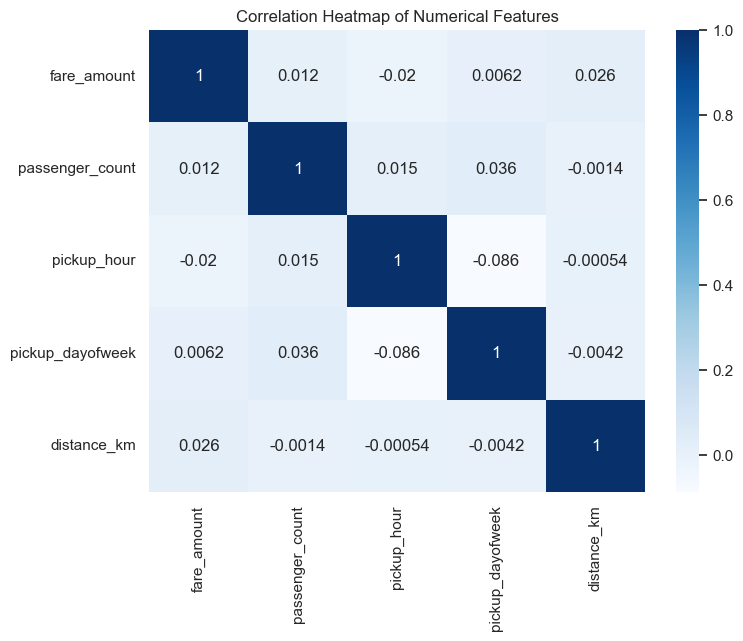

In [31]:
# Select numerical features for correlation
numeric_features = [
    "fare_amount",
    "passenger_count",
    "pickup_hour",
    "pickup_dayofweek",
    "distance_km"
]

corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Step 13: Prepare Features (X) and Target (y)

- Target variable: `fare_amount`  
- Features:
  - `passenger_count`
  - `pickup_hour`
  - `pickup_dayofweek`
  - `distance_km`
  - `time_of_day` (categorical)
  - `distance_category` (categorical)

I will use one-hot encoding to convert categorical columns into numeric dummy variables.


In [32]:
# Target variable
y = df["fare_amount"]

# Feature columns
feature_cols = [
    "passenger_count",
    "pickup_hour",
    "pickup_dayofweek",
    "distance_km",
    "time_of_day",
    "distance_category"
]

# Create feature dataframe
X = df[feature_cols].copy()

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=["time_of_day", "distance_category"], drop_first=True)

X.head()


,passenger_count,pickup_hour,pickup_dayofweek,distance_km,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,distance_category_Medium,distance_category_Long
0,1,19,3,1.683323,True,False,False,False,False
1,1,20,4,2.457590,True,False,False,True,False
2,1,21,0,5.036377,False,False,True,True,False
3,3,8,4,1.661683,False,True,False,False,False
4,5,17,3,4.475450,True,False,False,True,False


### Step 14: Split the Dataset into Training and Testing Sets

To evaluate the regression model, I will split the data into:
- **Training set** → used to train the model  
- **Testing set** → used to test performance on unseen data  

I will use an **80-20** split (80% train, 20% test).


In [33]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training set shape (X):", X_train.shape)
print("Testing set shape  (X):", X_test.shape)


Training set shape (X): (154924, 9)
Testing set shape  (X): (38732, 9)


### Step 15: Data Scaling / Normalization

Some regression models are sensitive to the scale of the features.

I will:
- Scale the numerical columns:
  - `passenger_count`
  - `pickup_hour`
  - `pickup_dayofweek`
  - `distance_km`  
- Use **StandardScaler** to transform them to have mean 0 and standard deviation 1.  
- Categorical dummy variables remain as they are (0/1).


In [34]:
# Numerical columns to scale
scale_cols = ["passenger_count", "pickup_hour", "pickup_dayofweek", "distance_km"]

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform train and test sets
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

X_train.head()


,passenger_count,pickup_hour,pickup_dayofweek,distance_km,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,distance_category_Medium,distance_category_Long
65913,2.527292,-0.227766,-1.565663,-0.045001,False,False,False,True,False
180355,-0.528878,0.539294,-1.052182,-0.054485,True,False,False,False,False
168056,-0.528878,-1.915299,1.001743,-0.054166,False,False,True,False,False
176304,-0.528878,-0.074354,1.001743,-0.053925,False,False,False,False,False
40855,-0.528878,0.999530,-0.538701,-0.052404,True,False,False,False,False


### Step 16: Save Processed Data

I will save:
- The full processed dataset  
- The train and test feature sets  

These files can be used later in the modeling notebook.


In [35]:
# Save processed full dataframe
df.to_csv("uber_processed_full.csv", index=False)

# Save train-test split
X_train.to_csv("X_train_processed.csv", index=False)
X_test.to_csv("X_test_processed.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Processed data saved successfully.")


Processed data saved successfully.
